In [2]:
%matplotlib inline
import pandas as pd
print(pd.__version__)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import StandardScaler
sns.set()

ModuleNotFoundError: No module named 'matplotlib'

In [94]:
train_df = pd.read_csv('titanic/train.csv')
test_df = pd.read_csv('titanic/test.csv')
vec = DictVectorizer()
train_df['Embarked'] = train_df.Embarked.fillna(train_df.Embarked.mode()[0])
train_df.groupby('Embarked').sum()
embarked = {'C':0,'Q':1,'S':2}
train_df.Embarked = [embarked[item] for item in train_df.Embarked]
train_df.groupby('Embarked').sum()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Embarked,,,,,,,
0,74820,93,317,4005.92,65,61,10072.2962
1,32178,30,224,786.50,33,13,1022.2543
2,290388,219,1516,16412.75,368,266,17599.3988


In [71]:
train_df.head(n= 5)
train_df.info()
train_df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

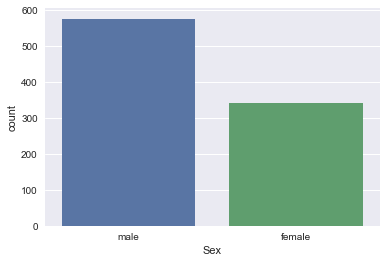

In [9]:
sns.countplot(x = 'Survived',data = train_df)
sns.countplot(x = 'Sex',data = train_df)

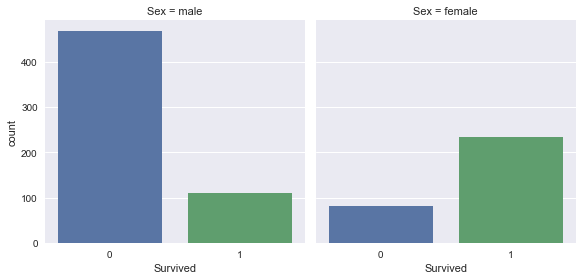

In [10]:
sns.factorplot(x = 'Survived',col= 'Sex',kind = 'count',data = train_df)

In [37]:
train_df.groupby('Sex').Survived.sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

In [17]:
print(train_df[train_df.Sex == 'female'].Survived.sum()/train_df[train_df.Sex == 'female'].Survived.count())
print(train_df[train_df.Sex == 'male'].Survived.sum()/train_df[train_df.Sex == 'male'].Survived.count())

0.742038216561
0.188908145581


In [30]:
test_df['Survived'] = test_df.Sex == 'female'
test_df['Survived'] = test_df.Survived.apply(lambda x:int(x))

test_df[['PassengerId','Survived']].to_csv('titanic/women.csv',index = False)

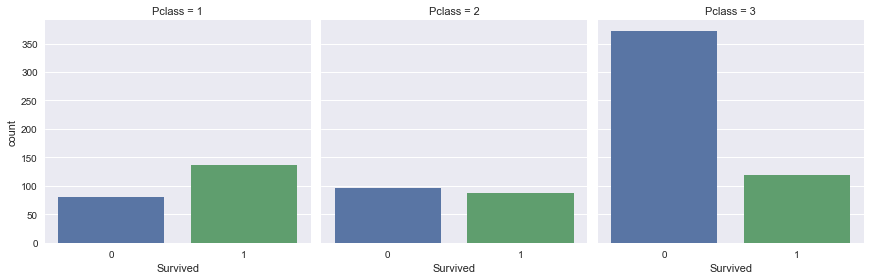

In [29]:
sns.factorplot(x = 'Survived',col = 'Pclass',kind = 'count',data = train_df)

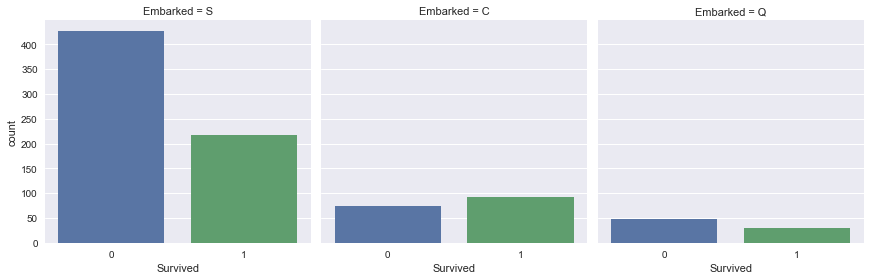

In [78]:
sns.factorplot(x = 'Survived',col = 'Embarked',kind = 'count',data = train_df)

(-0.49, -0.486]     106
[-0.648, -0.496]     92
(-0.105, 0.151]      91
(0.151, 0.921]       89
(-0.212, -0.105]     89
(-0.357, -0.212]     88
(0.921, 9.667]       87
(-0.496, -0.49]      87
(-0.437, -0.357]     84
(-0.486, -0.437]     78
Name: FareBin, dtype: int64

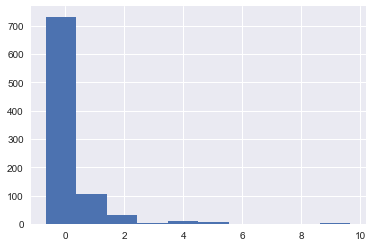

In [126]:
train_df_drop = train_df.dropna()
scale = StandardScaler()

train_df.Fare.hist()
train_df['FareBin'] = pd.qcut(train_df['Fare'], q=10)
train_df['FareBin'].value_counts()

Text(0.5, 1.0, 'Survived = 0')

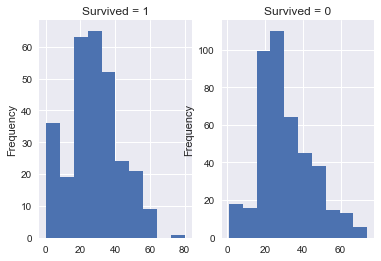

In [72]:

f,ax = plt.subplots(1,2)
#sns.distplot(train_df_drop.Age,kde = False)
train_df[train_df['Survived'] == 1].Age.plot.hist(ax = ax[0])
ax[0].set_title('Survived = 1')
train_df[train_df['Survived'] == 0].Age.plot.hist(ax = ax[1])
ax[1].set_title('Survived = 0')

In [79]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [105]:
train_df['Name'].str.split(',',expand = True)[1].str.split('.',expand =True)[0]

0           Mr
1          Mrs
2         Miss
3          Mrs
4           Mr
5           Mr
6           Mr
7       Master
8          Mrs
9          Mrs
10        Miss
11        Miss
12          Mr
13          Mr
14        Miss
15         Mrs
16      Master
17          Mr
18         Mrs
19         Mrs
20          Mr
21          Mr
22        Miss
23          Mr
24        Miss
25         Mrs
26          Mr
27          Mr
28        Miss
29          Mr
        ...   
861         Mr
862        Mrs
863       Miss
864         Mr
865        Mrs
866       Miss
867         Mr
868         Mr
869     Master
870         Mr
871        Mrs
872         Mr
873         Mr
874        Mrs
875       Miss
876         Mr
877         Mr
878         Mr
879        Mrs
880        Mrs
881         Mr
882       Miss
883         Mr
884         Mr
885        Mrs
886        Rev
887       Miss
888       Miss
889         Mr
890         Mr
Name: 0, dtype: object

In [114]:
import re
train_df.Name.str.split(',',expand =True)[1]

0                                        Mr. Owen Harris
1             Mrs. John Bradley (Florence Briggs Thayer)
2                                            Miss. Laina
3                     Mrs. Jacques Heath (Lily May Peel)
4                                      Mr. William Henry
5                                              Mr. James
6                                          Mr. Timothy J
7                                  Master. Gosta Leonard
8               Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                            Mrs. Nicholas (Adele Achem)
10                                  Miss. Marguerite Rut
11                                       Miss. Elizabeth
12                                     Mr. William Henry
13                                      Mr. Anders Johan
14                           Miss. Hulda Amanda Adolfina
15                               Mrs. (Mary D Kingcome) 
16                                        Master. Eugene
17                             